<div style="text-align: center">
    <img src="../../_static/xcdat-logo.png" alt="xCDAT logo" style="display: inline-block; width:600px;">
</div>

# LLNL Climate and Weather Seminar Series (01/25/2023) - A Gentle Introduction to xCDAT

<h3 style="text-align: left;">"A Python package for simple and robust climate data analysis."</h3>
<h4 style="text-align: left; font-style:italic">Core Developers: Tom Vo, Stephen Po-Chedley, Jason Boutte, Jill Zhang, Jiwoo Lee</h4>
<p style="text-align: left;">With thanks to Peter Gleckler, Paul Durack, Karl Taylor, and Chris Golaz</p>

---

_This work is performed under the auspices of the U. S. DOE by Lawrence Livermore National Laboratory under contract No. DE-AC52-07NA27344._


## Presentation Overview

Intended audience: Some or no familiarity with `xarray` and/or `xcdat`

1. **Driving force** behind xCDAT
2. **Goals and milestones** of CDAT's successor
3. Introducing xCDAT
4. Understanding the **basics of Xarray**
5. How **xCDAT extends Xarray** for climate data analysis
6. Technical design philosophy and APIs
7. **Demo** of capabilities
8. How to **get involved**


### Notebook Kernel Setup

Users can [install their own instance of xcdat](../getting-started-guide/installation.rst) and follow these examples using their own environment (e.g., with VS Code, Jupyter, Spyder, iPython) or [enable xcdat with existing JupyterHub instances](../getting-started-guide/getting-started-hpc-jupyter.rst).

First, create the conda environment:

```bash
conda create -n xcdat_notebook -c conda-forge xcdat xesmf matplotlib ipython ipykernel cartopy nc-time-axis gsw-xarray jupyter pooch
```

Then install the kernel from the `xcdat_notebook` environment using `ipykernel` and name the kernel with the display name (e.g., `xcdat_notebook`):

```bash
python -m ipykernel install --user --name xcdat_notebook --display-name xcdat_notebook
```

Then to select the kernel `xcdat_notebook` in Jupyter to use this kernel.


## The Driving Force Behind xCDAT

- The **CDAT (Community Data Analysis Tools)** library has provided a suite of robust and comprehensive open-source climate data analysis and visualization packages for over **20 years**
- A driving **need** for a **modern successor**
  - Focus on a maintainable and extensible library
  - Serve the needs of the climate community in the long-term

 <div style="text-align: center">
    <img src="../../_static/cdat-logo.png" alt="CMIP6 logo" style="display: inline-block; margin-right:50px; width:400px">
    <img src="../../_static/cmip-logo.jpg" alt="CMIP6 logo" style="display: inline-block; width:400px">
    
</div>


## Goals and Milestones for CDAT's Successor

1. **Offer similar core capabilities**

   1. _For example geospatial averaging, temporal averaging, and regridding_

2. Use **modern technologies** in the library’s stack

   1. Support parallelism and lazy operations

3. Be **maintainable**, **extensible**, and **easy-to-use**

   1. Python Enhancement Proposals (PEPs)
   2. Automate DevOps processes (unit testing, code coverage)
   3. Actively maintain documentation

4. **Cultivate an open-source community** that can sustain the project

   1. Encourage GitHub contributions
   2. Community engagement efforts (e.g., Pangeo, ESGF)


## Introducing xCDAT

- xCDAT is an **extension of xarray** for **climate data analysis** on **structured grids**
- **Goal** of providing features and utilities for **simple and robust analysis of climate data**
- Jointly developed by scientists and developers from:
  - **E3SM Project** (Energy Exascale Earth System Model Project)
  - **PCMDI** (Program for Climate Model Diagnosis and Intercomparison)
  - **SEATS Project** (Simplifying ESM Analysis Through Standards Project)
  - Users around the world **via** **GitHub**

<div style="text-align: center; margin-top:10px">
<img src="../../_static/e3sm-logo.jpg" alt="E3SM logo" align=\"center\" style="display: inline-block;     margin-right:100px; width:300px;">
<img src="../../_static/pcmdi-logo.png" alt="PCMDI logo" style="display: inline-block; margin-right:100px; width:300px;">
<img src="../../_static/seats-logo.png" alt="SEATS logo" style="display: inline-block; width:300px;">

</div>


## Before We Dive Deeper, Let's Talk About Xarray

- Xarray is an evolution of an internal tool developed at The Climate Corporation
- Released as open source in May 2014
- **NumFocus** fiscally sponsored project since August 2018

<div style="text-align: center">
    <img src="../../_static/xarray-logo.png" alt="xarray logo" style="display: inline-block; margin-right: 50px; width:400px;">
    <img src="../../_static/NumFocus-logo.png" alt="NumFOCUS logo" style="display: inline-block; width:400px">
</div>


## Key Features and Capabilities in Xarray

- **“N-D labeled arrays and datasets in Python”**
  - Built upon and extends NumPy and pandas
- **Interoperable with scientific Python ecosystem** including **NumPy, Dask, Pandas, and Matplotlib**
- Supports file I/O, indexing and selecting, interpolating, grouping, aggregating, parallelism (Dask), plotting (matplotlib wrapper)
  - Supported formats include: netCDF, Iris, OPeNDAP, Zarr, and GRIB

<!-- <div style="text-align: center">
<img src="../../_static/numpy-logo.svg" alt="NumPy logo" style="display: inline-block; width:300px; margin-right: 50px">
<img src="../../_static/pandas-logo.svg" alt="Pandas logo" style="display: inline-block; width:300px; margin-right: 50px">
    <img src="../../_static/dask-logo.svg" alt="Dask logo" style="display: inline-block; width:300px">
</div> -->

Source: <cite>https://xarray.dev/#features</cite>


## Why use Xarray?

> _"Xarray introduces **labels** in the form of **dimensions, coordinates and attributes** on **top of raw NumPy-like
> multidimensional arrays**, which allows for a **more intuitive, more concise, and less error-prone developer
> experience**."_
>
> &mdash; <cite> https://xarray.pydata.org/en/v2022.10.0/getting-started-guide/why-xarray.html</cite>


- **Apply operations over dimensions by name**
  - `x.sum('time')`
- **Select values by label** (or logical location) instead of integer location
  - `x.loc['2014-01-01']` or `x.sel(time='2014-01-01')`
- **Mathematical operations vectorize across multiple dimensions** (array broadcasting) based on **dimension names**, not shape
  - `x - y`
- Easily use the **split-apply-combine paradigm** with **groupby**
  - `x.groupby('time.dayofyear').mean()`.
- **Database-like alignment** based on coordinate labels that **smoothly handles missing values**
  - `x, y = xr.align(x, y, join='outer')`
- Keep track of **arbitrary metadata in** the form of a **Python dictionary**
  - `x.attrs`

Source: <cite>https://docs.xarray.dev/en/v2022.10.0/getting-started-guide/why-xarray.html#what-labels-enable</cite>


## The Xarray Data Models

> "Xarray data models are **borrowed from netCDF file format**, which provides xarray with a **natural and portable
> serialization format**."
>
> &mdash; <cite>https://docs.xarray.dev/en/latest/getting-started-guide/why-xarray.html</cite>


1. **`xarray.Dataset`**

   - A **dictionary-like container** of **DataArray objects** with **aligned dimensions**
     - **DataArray** objects are **classified** as **"coordinate variables"** or **"data variables"**
     - All **data variables** have a **shared union of coordinates**
   - Serves a similar purpose to a `pandas.DataFrame`

2. **`xarray.DataArray`**
   - A class that attaches **dimension names**, **coordinates**, and **attributes** to **multi-dimensional arrays** (aka "labeled arrays")
   - An N-D generalization of a `pandas.Series`


<div style="text-align: center">
    <img src="../../_static/dataset-diagram.webp" alt="xarray logo" style="display: inline-block; width:1000px">
</div>


### Exploring the Xarray Data Models

The data used in this example can be found in the [xarray-data repository](https://github.com/pydata/xarray-data).


In [1]:
# This style import is necessary to properly render Xarray's HTML output with
# the Jupyer RISE extension.
# GitHub Issue: https://github.com/damianavila/RISE/issues/594
# Source: https://github.com/smartass101/xarray-pydata-prague-2020/blob/main/rise.css

from IPython.core.display import HTML

style = """
<style>
.reveal pre.xr-text-repr-fallback {
    display: none;
}
.reveal ul.xr-sections {
    display: grid
}

.reveal ul ul.xr-var-list {
    display: contents
}
</style>
"""


HTML(style)

In [2]:
import xarray as xr

ds = xr.tutorial.open_dataset("air_temperature", use_cftime=True)

### The `Dataset` Model


In [3]:
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) object 23kB 2013-01-01 00:00:00 ... 2014-12-31 18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

**A dictionary-like container of labeled arrays (DataArray objects) with aligned dimensions.**

Key properties:

- `dims`: a **dictionary** mapping from **dimension names** **to** the **fixed length** of each dimension (e.g., {'x': 6, 'y': 6, 'time': 8})
- `coords`: **a dict-like container** of **DataArrays** intended to **label points** used in **`data_vars`** (e.g., arrays of numbers, datetime objects or strings)
- `data_vars`: **a dict-like container** of **DataArrays** corresponding to **variables**
- `attrs`: **dict** to hold arbitrary **metadata**

Source: <cite>https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataset</cite>


### The `DataArray` Model


In [4]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) object 23kB 2013-01-01 00:00:00 ... 2014-12-31 18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

**A class that attaches dimension names, coordinates, and attributes to multi-dimensional arrays (aka "labeled arrays")**

Key properties:

- `values`: a **numpy.ndarray** holding the array’s **values**
- `dims`: **dimension names** for each **axis** (e.g., ('x', 'y', 'z'))
- `coords`: a **dict-like container** of **arrays (coordinates)** that **label each point** (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
- `attrs`: **dict** to hold arbitrary **metadata **(attributes)

Source: <cite>https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray</cite>


## Resources for Learning Xarray

- Here are some highly recommended resources:
  - [Xarray Tutorial](https://tutorial.xarray.dev/intro.html)
  - ["Xarray in 45 minutes"](https://tutorial.xarray.dev/overview/xarray-in-45-min.html#)
  - [Xarray Documentation](https://docs.xarray.dev/en/stable/index.html)
  - [Xarray API Reference](https://docs.xarray.dev/en/stable/api.html)


## xCDAT Extends Xarray for Climate Data Analysis

- **Some key xCDAT features** are inspired by or ported **from the core CDAT library**
  - _e.g., spatial averaging, temporal averaging, regrid2 for horizontal regridding_
- Other features **leverage powerful libraries** in the **xarray ecosystem**

  - **xESMF** for horizontal regridding
  - **xgcm** for vertical interpolation
  - **CF-xarray** for CF convention metadata interpretation

- xCDAT strives to **support datasets** **CF compliant** and **common non-CF compliant metadata** (_time units in “months since …” or “years since …”_)
- Inherent support for **lazy operations** and **parallelism** through **xarray + dask**

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/esmf-logo.png" alt="esmf logo" style="display: inline-block; margin-right:50px; width:400px;">
    <img src="../../_static/CF-xarray.png" alt="cf-xarray logo" style="display: inline-block; margin-right:50px; width:400px;">
     <img src="../../_static/dask-logo.png" alt="dask logo" style="display: inline-block; width:400px;">

</div>


## The Technical Design Philosophy

- **Streamline the user experience** of developing code to analyze climate data
- **Reduce the complexity and overhead** for implementing certain features with xarray (_e.g., temporal averaging, spatial averaging_)
- Encourage **reusable functionalities** through a **single library**


## Leveraging the APIs

xCDAT provides public APIs in two ways:

1. Top-level APIs functions
   - e.g., `xcdat.open_dataset()`, `xcdat.center_times()`
   - Usually for opening datasets and performing dataset level operations
2. Accessor classes
   - xcdat provides `Dataset` accessors, which are **implicit namespaces for custom functionality**.
   - Accessor **namespaces** clearly identifies **separation from built-in xarray methods**.
   - Operate on variables within the `xr.Dataset`
   - e.g., `ds.spatial`, `ds.temporal`, `ds.regridder`

<div style="text-align: center; margin-top: 10px">
    <figure>
    <img src="../../_static/accessor_api.svg" alt="xcdat accessor" style="display: inline-block; width:75%">
        <figcaption style="font-style: italic">xcdat spatial functionality is exposed by chaining the <span style="background-color: #e4e6e8">.spatial</span> accessor attribute to the <span style="background-color: #e4e6e8">xr.Dataset</span> object.</figcaption>
    </figure>
</div>

Source: <cite>https://xcdat.readthedocs.io/en/latest/api.html</cite>


## Key Features in xCDAT

<style type="text/css">
table td, table th {
    border: 1px solid lightgray;
}
</style>

<table>
    <tr>
        <td>Feature</td>
        <td>API</td>
        <td>Description</td>
    </tr>
    <tr>
        <td>Extend `xr.open_dataset()` and `xr.open_mfdataset()`</td>
        <td>
            <ul>
                <li>`open_dataset()`</li>
                <li>`open_mfdataset()`</li>
            </ul>
        </td>
        <td>
            <ul>
                <li>Bounds generation</li>
                <li>Time decoding (CF and select non-CF time units)</li>
                <li>Centering of time coordinates</li>
                <li>Conversion of longitudinal axis orientation</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Temporal averaging</td>
        <td>
            <ul>
                <li>`ds.temporal.average()`</li>
                <li>`ds.temporal.group_average()`</li>
                <li>`ds.temporal.climatology()`</li>
                <li>`ds.temporal.departures()`</li>
            </ul>
        <td>
            <ul>
                <li>Single snapshot and group average</li>
                <li>Climatology and departure</li>
                <li>Weighted or unweighted</li>
                <li>Optional seasonal configuration< (e.g., custom seasons)</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Geospatial averaging</td>
        <td>`ds.spatial.average()`</td>
        <td>
            <ul>
                <li>Rectilinear grids</li>
                <li>Weighted</li>
                <li>Optional specification of region domain</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Horizontal regridding</td>
        <td>`ds.regridder.horizontal()`</td>
         <td>
            <ul>
                <li>Rectilinear and curvilinear grids</li>
                <li>Extends xESMF horizontal regridding</li>
                <li>Python implementation of regrid2</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td>Vertical regridding</td>
        <td>`ds.regridder.vertical()`</td>
        <td>
            <ul>
                <li>Transform vertical coordinates</li>
                <li>Extends xgcm vertical interpolation</li>
                <li>Linear, logarithmic, and conservative interpolation</li>
                <li>Decode parametric vertical coordinates if required</li>
            </ul>
        </td>
    </tr>
</table>


## A Demo of xCDAT Capabilities

- Prerequisites
  - Installing `xcdat`
  - Import `xcdat`
  - Open a dataset and apply postprocessing operations
- Scenario 1 - Calculate the spatial averages over the tropical region
- Scenario 2 - Calculate temporal average
- Scenario 3 - Horizontal regridding (bilinear, gaussian grid)


### Installing `xcdat`

xCDAT is available on Anaconda under the `conda-forge` channel (https://anaconda.org/conda-forge/xcdat)

Two ways to install `xcdat` with recommended dependencies (`xesmf`):

1. Create a conda environment from scratch (`conda create`)

   ```bash
   conda create -n <ENV_NAME> -c conda-forge xcdat
   conda activate <ENV_NAME>
   ```

2. Install `xcdat` in an existing conda environment (`conda install`)

   ```bash
   conda activate <ENV_NAME>
   conda install -c conda-forge xcdat
   ```

_Source_: <cite>https://xcdat.readthedocs.io/en/latest/getting-started.html</cite>


### Open the example dataset

In the example below, we will be working with the `"ersstv5"` dataset (NOAA’s Extended Reconstructed Sea Surface Temperature monthly averages). The data used in this example can be found in the [xarray-data repository](https://github.com/pydata/xarray-data).


In [5]:
# This gives access to all xcdat public top-level APIs and accessor classes.
import xcdat as xc

# We import these packages specifically for plotting. It is not required to use xcdat.
import matplotlib.pyplot as plt
import pandas as pd

ds = xc.tutorial.open_dataset("ersstv5")


In [6]:
ds

<xarray.Dataset> Size: 40MB
Dimensions:    (lat: 89, lon: 180, time: 624, bnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 10kB 1970-01-01 ... 2022-01-01
    sst        (time, lat, lon) float32 40MB ...
    lon_bnds   (lon, bnds) float32 1kB -1.0 1.0 1.0 3.0 ... 357.0 357.0 359.0
    lat_bnds   (lat, bnds) float32 712B 89.0 87.0 87.0 ... -87.0 -87.0 -89.0
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

### Scenario 1: Spatial Averaging

Related accessor: `ds.spatial`

In this example, we **calculate the spatial average** of `tas` over the tropical region and **plot the first 100 time steps**.


In [7]:
ds_trop_avg = ds.spatial.average("sst", axis=["X","Y"], lat_bounds=(-25,25))
ds_trop_avg.sst

<xarray.DataArray 'sst' (time: 624)> Size: 2kB
array([26.631329, 26.705292, 26.98488 , 27.125925, 26.996227, 26.501259,
       26.055984, 25.845926, 25.900852, 26.076845, 26.198368, 26.093525,
       26.075737, 26.14219 , 26.424835, 26.719378, 26.649567, 26.209444,
       25.846169, 25.689804, 25.823011, 25.935263, 26.056042, 25.974241,
       26.20394 , 26.468096, 26.646122, 26.939156, 26.908953, 26.625622,
       26.261488, 26.131067, 26.275883, 26.582355, 26.740005, 26.838072,
       26.800411, 26.852734, 27.046812, 27.140924, 27.038115, 26.597162,
       26.20222 , 25.975567, 26.062819, 26.162876, 26.22172 , 26.081474,
       25.981558, 26.139683, 26.416403, 26.677378, 26.709398, 26.34784 ,
       26.035782, 25.896276, 25.948477, 26.069725, 26.180964, 26.131832,
       26.146044, 26.284605, 26.531815, 26.72588 , 26.65785 , 26.29398 ,
       25.948195, 25.693113, 25.715391, 25.835045, 25.886362, 25.818575,
       25.83135 , 26.09478 , 26.41012 , 26.684383, 26.623486, 26.38997 ,
       26.02159 , 25.917963, 26.035025, 26.373516, 26.515055, 26.485891,
       26.546951, 26.65999 , 26.855495, 27.018436, 27.00404 , 26.684877,
       26.22376 , 26.023731, 26.14824 , 26.360998, 26.456373, 26.422913,
       26.52335 , 26.614433, 26.834625, 26.969051, 26.867468, 26.579107,
       26.202915, 25.938595, 25.997978, 26.17897 , 26.351046, 26.408201,
       26.485456, 26.60376 , 26.920435, 27.18515 , 27.05317 , 26.732649,
       26.28023 , 26.107582, 26.25158 , 26.452969, 26.632126, 26.659203,
...
       26.518806, 26.35496 , 26.491503, 26.694168, 26.857384, 26.859417,
       26.745867, 26.904196, 27.20103 , 27.42096 , 27.338732, 26.892897,
       26.500912, 26.354727, 26.476103, 26.653496, 26.796238, 26.765223,
       26.708141, 26.834475, 27.158741, 27.454655, 27.502104, 27.17906 ,
       26.687178, 26.517845, 26.650208, 26.855305, 26.957397, 26.916517,
       26.88318 , 27.033482, 27.332752, 27.623726, 27.624184, 27.300755,
       26.918924, 26.780369, 26.992725, 27.224802, 27.374895, 27.384508,
       27.454712, 27.486588, 27.792337, 27.892487, 27.743916, 27.369473,
       26.926521, 26.709026, 26.72004 , 26.898716, 26.974241, 26.971046,
       27.029509, 27.13974 , 27.460539, 27.67185 , 27.605137, 27.23249 ,
       26.861979, 26.66451 , 26.66374 , 26.795525, 26.879774, 26.73458 ,
       26.705738, 26.811916, 27.131622, 27.406528, 27.37579 , 26.994612,
       26.629217, 26.47834 , 26.613422, 26.895683, 27.022984, 27.03153 ,
       26.970623, 27.138441, 27.434196, 27.67714 , 27.603256, 27.270775,
       26.83936 , 26.600626, 26.654827, 26.888515, 27.077467, 27.103714,
       27.141281, 27.245361, 27.586359, 27.808243, 27.67135 , 27.255264,
       26.858791, 26.627237, 26.602036, 26.718609, 26.756695, 26.701956,
       26.635096, 26.785416, 27.121042, 27.358814, 27.346893, 27.02567 ,
       26.687592, 26.502565, 26.551847, 26.699577, 26.831646, 26.73515 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

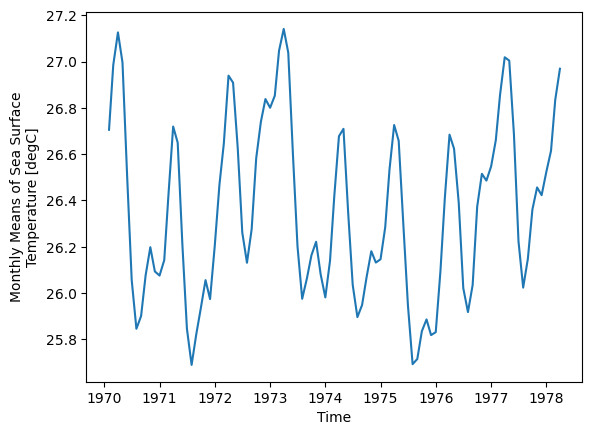

In [8]:
ds_trop_avg.sst.isel(time=slice(1, 100)).plot()

### Scenario 2: Calculate temporal average

Related accessor: `ds.temporal`

In this example, we calculate the **temporal average of `sst` as a single snapshot** (time dimension is collapsed).


In [9]:
ds_avg = ds.temporal.average("sst", weighted=True)
ds_avg.sst

<xarray.DataArray 'sst' (lat: 89, lon: 180)> Size: 128kB
array([[-1.79940373, -1.79943456, -1.79945743, ..., -1.7995131 ,
        -1.79943685, -1.7993822 ],
       [-1.79943144, -1.79937653, -1.79934422, ..., -1.79983558,
        -1.79960169, -1.79951458],
       [-1.79998346, -1.79979723, -1.79967503, ..., -1.79986016,
        -1.79991259, -1.79996117],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
Attributes: (12/13)
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    ...            ...
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    operation:     temporal_avg
    mode:          average
    freq:          month
    weighted:      True

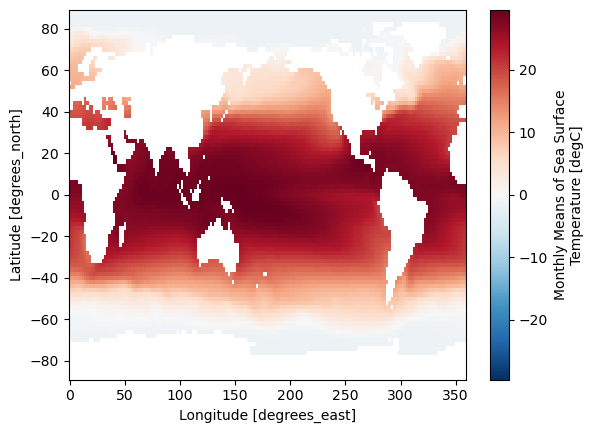

In [10]:
ds_avg.sst.plot(label="weighted")

### Scenario 3: Horizontal Regridding

Related accessor: `ds.regridder`

In this example, we will generate a gaussian grid with 32 latitudes to regrid our input data to.


#### Create the output grid


In [11]:
output_grid = xc.create_gaussian_grid(32)
output_grid

<xarray.Dataset> Size: 2kB
Dimensions:   (lon: 65, bnds: 2, lat: 32)
Coordinates:
  * lon       (lon) float64 520B 0.0 5.625 11.25 16.88 ... 348.8 354.4 360.0
  * lat       (lat) float64 256B 85.76 80.27 74.74 ... -74.74 -80.27 -85.76
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 1kB -2.812 2.812 2.812 ... 357.2 357.2 362.8
    lat_bnds  (lat, bnds) float64 512B 90.0 83.21 83.21 ... -83.21 -83.21 -90.0

#### Plot the Input vs. Output Grid


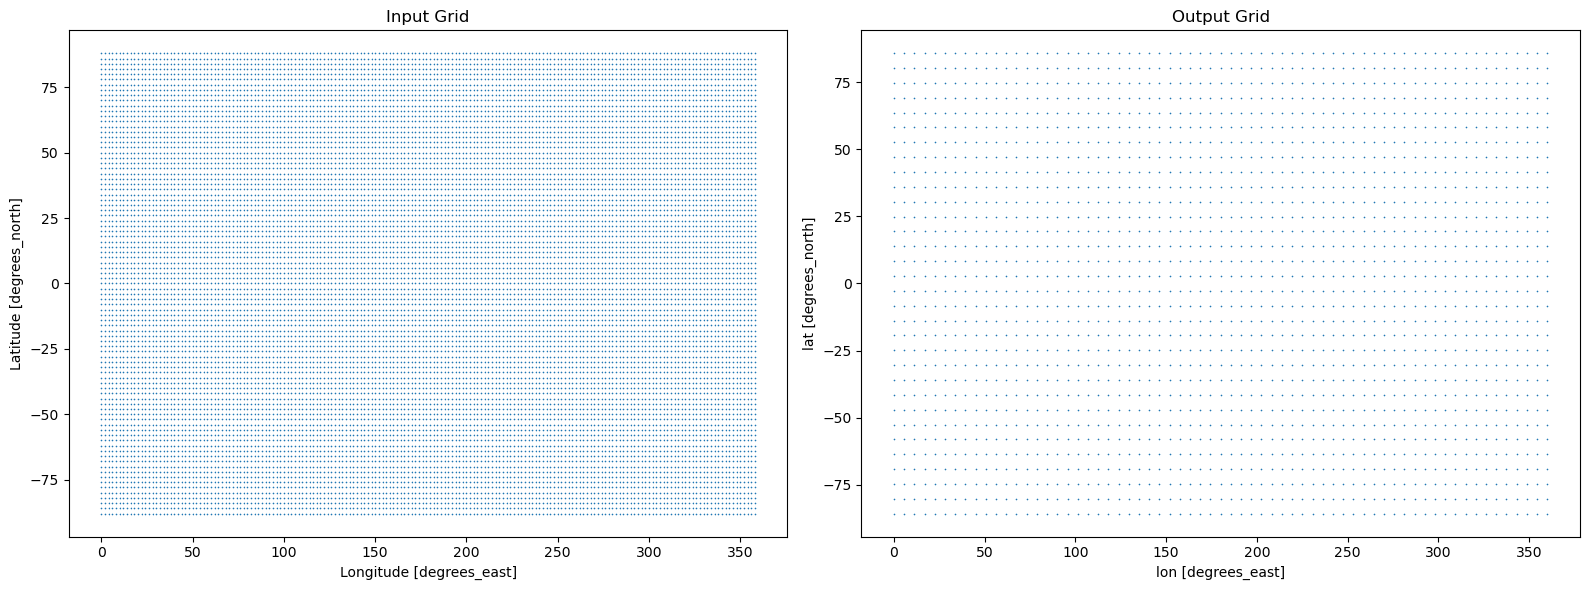

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

input_grid = ds.regridder.grid
input_grid.plot.scatter(x='lon', y='lat', s=5, ax=axes[0], add_colorbar=False, cmap=plt.cm.RdBu)
axes[0].set_title('Input Grid')

output_grid.plot.scatter(x='lon', y='lat', s=5, ax=axes[1], add_colorbar=False, cmap=plt.cm.RdBu)
axes[1].set_title('Output Grid')

plt.tight_layout()

#### Regrid the data

xCDAT offers horizontal regridding with `xESMF` (default) and a Python port of `regrid2`.
We will be using `xESMF` to regrid.


In [13]:
# xesmf supports "bilinear", "conservative", "nearest_s2d", "nearest_d2s", and "patch"
output = ds.regridder.horizontal('sst', output_grid, tool='xesmf', method='bilinear')

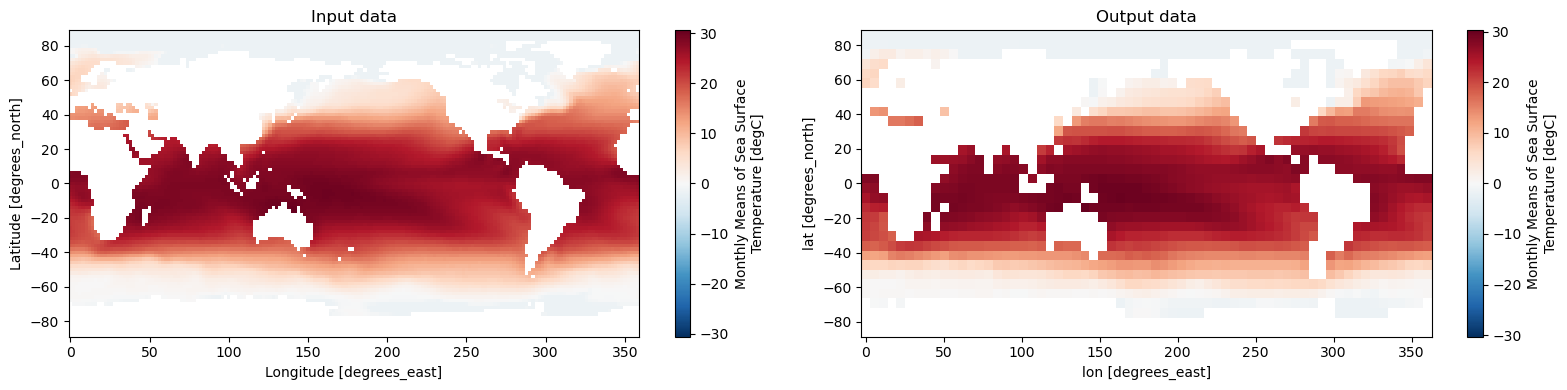

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ds.sst.isel(time=0).plot(ax=axes[0])
axes[0].set_title('Input data')

output.sst.isel(time=0).plot(ax=axes[1])
axes[1].set_title('Output data')

plt.tight_layout()

## Parallelism with Dask

<div style="text-align:center">
  <img src="../../_static/dask-logo.svg" alt="Dask logo" style="display: inline-block; width:300px;">
</div>

> Nearly all existing xarray methods have been extended to work automatically with Dask arrays for parallelism
>
> &mdash; <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html#using-dask-with-xarray</cite>


- Parallelized xarray methods include **indexing, computation, concatenating and grouped operations**
- xCDAT APIs that build upon xarray methods inherently support Dask parallelism
  - Dask arrays are loaded into memory only when absolutely required (e.g., generating weights for averaging)


In [15]:
# Use .chunk() to activate Dask arrays
# NOTE: `open_mfdataset()` automatically chunks by the number of files, which
# might not be optimal.
ds = xc.tutorial.open_dataset("ersstv5", chunks={"time": "auto"})
ds

<xarray.Dataset> Size: 40MB
Dimensions:    (lat: 89, lon: 180, time: 624, bnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 10kB 1970-01-01 ... 2022-01-01
    sst        (time, lat, lon) float32 40MB dask.array<chunksize=(624, 89, 180), meta=np.ndarray>
    lon_bnds   (lon, bnds) float32 1kB -1.0 1.0 1.0 3.0 ... 357.0 357.0 359.0
    lat_bnds   (lat, bnds) float32 712B 89.0 87.0 87.0 ... -87.0 -87.0 -89.0
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-06-07

### Further Dask Guidance

Visit these pages for more guidance (e.g., when to parallelize):

- Parallel computing with Dask (xCDAT): https://xcdat.readthedocs.io/en/latest/examples/parallel-computing-with-dask.html
- Parallel computing with Dask (Xarray): https://docs.xarray.dev/en/stable/user-guide/dask.html
- Xarray with Dask Arrays: https://examples.dask.org/xarray.html


## Key Takeaways

- A driving need for a **modern successor to CDAT**
- Serves the climate community in the long-term
- xCDAT is an **extension of xarray** for **climate data analysis** on **structured grids**
- Goal of providing features and utilities for **simple and robust analysis of climate data**

<div style="text-align:center">
  <img src="../../_static/xcdat-logo.png" alt="xcdat logo" style="display: inline-block; width:600px;">
</div>


### Where to Find xCDAT

- xCDAT is available for installation through **Anaconda**
  - Install command: **`conda install -c conda-forge xcdat xesmf`**
- Check out xCDAT’s **Read the Docs**, which we strive to keep up-to-date
  - [https://xcdat.readthedocs.io/en/stable/](https://xcdat.readthedocs.io/en/stable/)

<div style="text-align:center">
    <div>
        <img src="./images/anaconda-logo.png" alt="Anaconda logo" style="display: inline-block; width:300px;">
        <img src="./images/conda-forge-logo.png" alt="conda-forge logo" style="display: inline-block; width:300px;">
    </div>
    <div>
        <img src="./images/rtd-logo.png" alt="RTD logo" style="display: inline-block; width:300px;">
        <img src="./images/rtd-screenshot.png" alt="RTD screenshot" style="display: inline-block; width:300px;">
    </div>
</div>


### Get Involved on GitHub!

- **Code contributions** are welcome and appreciated
  - GitHub Repository: https://github.com/xCDAT/xcdat
  - Contributing Guide: https://xcdat.readthedocs.io/en/latest/contributing.html
- **Submit and/or address tickets** for feature suggestions, bugs, and documentation updates
  - GitHub Issues: https://github.com/xCDAT/xcdat/issues
- **Participate in forum discussions** on version releases, architecture, feature suggestions, etc.
  - GitHub Discussions: https://github.com/xCDAT/xcdat/discussions
    <div style="text-align:center">
    <img src="../../_static/github-logo-icon.png" alt="GitHub logo" style="display: inline-block; max-width:200px;">
  </div>
